# Pythonによる科学計算（Numpy）

今回はPythonの数値計算モジュールであるNumpyを用います。Numpyはこの講座を通して用いるので基本的な使い方を学んでいきましょう。

ただしこの章で扱うものはNumpyの氷山の一角であり，機械学習という文脈でよく使うもののみです。

### 目次

**[2.1 Numpyの作法](#2.1-Numpyの作法)**
> [2.1.1 PythonのListとnumpy.ndarrayの違い](#2.1.1-PythonのListとnumpy.ndarrayの違い)\
> [2.1.2 numpy.ndarrayの基本的な演算](#2.1.2-numpy.ndarrayの基本的な演算)\
> [2.1.3 練習問題](#2.1.3-練習問題)

**[2.2 NumpyのIndex 1](#2.2-NumpyのIndex-1)**
>[2.2.1 インデクシングのよる値の取得](#2.2.1-インデクシングのよる値の取得)\
>[2.2.2 スライシング](#2.2.2-スライシング)\
>[2.2.3 ブールインデックス参照](#2.2.3-ブールインデックス参照)\
>[2.2.4 練習問題](#2.2.4-練習問題)

**[2.3 Numpyの2次元配列](#2.3-Numpyの2次元配列)**
>[2.3.1 2次元配列の作成](#2.3.1-2次元配列の作成)\
>[2.3.2 ユニバーサル関数](#2.3.2-ユニバーサル関数)\
>[2.3.3 axisと集約関数](#2.3.3-axisと集約関数)\
>[2.3.4 練習問題](#2.3.4-練習問題)

**[2.4 NumpyのIndex2](#2.4-NumpyのIndex-2)**
>[2.4.1 基本](#2.4.1-基本)\
>[2.4.2 スライシング](#2.4.2-スライシング)\
>[2.4.3 ブールインデックス参照](#2.4.3-ブールインデックス参照)\
>[2.4.4 練習問題](#2.4.4-練習問題)

**[2.5 Numpyの発展](#2.5-Numpyの発展操作)**
> [2.5.1 科学定数](#2.5.1-科学定数)\
> [2.5.2 乱数を値にもつNumpyの配列](#2.5.2-乱数を値にもつNumpyの配列)\
> [2.5.3 線形代数の基本的な計算](#2.5.3-線形代数の基本的な計算)

**[2.6 Numpyの学習の仕方](#2.6-Numpyの学習の仕方)**
>[2.6.1 プログラミングの調べ方](#2.6.1-プログラミングの調べ方)\
>[2.6.2 練習問題](#2.6.2-練習問題)

**[2.7 総合問題](#2.7-総合問題)**

この授業で使うライブラリをインポートしておきます。詳細は後々丁寧に解説していきます。

In [ ]:
import numpy as np
from numpy import random
from numpy import linalg as LA

# 2.1 Numpyの作法

この節からNumpyに入門していきます。

## 2.1.1 PythonのListとnumpy.ndarrayの違い

機械学習ではデータをベクトルとして捉え，数学的な計算(行列演算，最適化など)を通して学習をします。このベクトルや行列といったものに対する演算に対して基本的な関数が組み込まれているのがNumpyモジュールとなります。

まず，**なぜNumpyを使うのか**を知るために，Python標準の機能とNumpyを比べてみましょう。まず，以下の2つのPython配列を考えます。

In [ ]:
a = [2, 9, 9, 7, 9, 2]
b = [3, 1, 4, 1, 5, 9]

この2つの配列を6次元の横ベクトルとして操作することを考えます。例えばこのベクトルに対して，内積やaとbの各成分の和を取ったベクトルを計算する場合，Pythonでは次のように書く必要があります。

In [ ]:
# 内積
def dot_product(a, b):
    assert len(a)==len(b) # aとbの長さが同じでないときエラーを返すようにする

    ab = 0
    for i in range(len(a)):
        ab += a[i]*b[i]

    return ab

def add_vector(a, b):
    assert len(a)==len(b) # aとbの長さが同じでないときエラーを返すようにする

    add_ab = [a[i]+b[i] for i in range(len(a))]

    return add_ab

In [ ]:
print("内積:", dot_product(a, b))
print("和:", add_vector(a, b))

内積: 121
和: [5, 10, 13, 8, 14, 11]


しかし，Numpyにはすでにこれらの関数や演算が実装されています。実際に使ってみましょう。

In [ ]:
import numpy as np # numpyをimportする

風習として，numpyはnpと省略して使います。本講座でもそれに則ります。

Numpyでは`np.ndarray`という配列が用意されています。これはN次元配列といい，ベクトルや行列・それ以上の次元の配列(テンソル)に対して統一して用意された型です。

PythonのListは`np.array()`という関数を用いて簡単に`np.ndarray`に変換できます。

In [ ]:
a = np.array(a)
b = np.array(b)

print("a: ", a)
print("b: ", b)
print("type of a: ", type(a))
print("type of b: ", type(b)) # aとbの型を確認する

a:  [2 9 9 7 9 2]
b:  [3 1 4 1 5 9]
type of a:  <class 'numpy.ndarray'>
type of b:  <class 'numpy.ndarray'>


`a`と`b`の内積と和は次のように計算されます。

In [ ]:
print("内積:", np.dot(a, b))
print("和:", a+b)

内積: 121
和: [ 5 10 13  8 14 11]


このように，Numpyではすでに基本的な操作や関数が充実しており，Pythonでわざわざ実装しなくてよいのです。

### *Tips*
> 実は他にNumpyを使う大きなメリットがあります。それは**実行時間**という観点です。Numpyの内部ではC言語によって記述されていて，また行列演算にはBLAS APIという高性能の行列演算ライブラリを用いているのでPythonとは比べ物にならないくらい高速となります。

## 2.1.2 numpy.ndarrayの基本的な演算

ここでは上で用いた`a`, `b`とは別に新しいものを使用します。`np.ndarray`に変換するのを忘れないように！

In [ ]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([2, 2, 3, 6, 0])

このセクションでは`np.ndarray`の基本的な演算を紹介していきます。

ここでNumpyの演算の基本は**ユニバーサル**です。ここでのユニバーサルな演算とは，配列の各要素に個別に演算を適用することを指します。実際に例を見て実感していきましょう。

### 四則演算

四則演算は通常のPythonの数値型と同じ記号によって計算できます。これは各要素の四則演算を返します(**ユニバーサル！**)。

In [ ]:
print("和: ", a + b) #これは通常のベクトルの和と一致
print("差: ", a - b) #これは通常のベクトルの差と一致
print("積: ", a * b) #これはベクトルの各要素の積(=アダマール積とかいう)
print("商: ", a / b) #これはベクトルの各要素の商

和:  [ 3  4  6 10  5]
差:  [-1  0  0 -2  5]
積:  [ 2  4  9 24  0]
商:  [0.5        1.         1.         0.66666667        inf]


<ipython-input-9-89679e05d7f7>:4: RuntimeWarning: divide by zero encountered in divide
  print("商: ", a / b) #これはベクトルの各要素の商


### *Tips*
>商では，ゼロ除算をしてしまったために`inf`というものが現れています。これは`np.inf`というnumpyで定義された特殊な数で無限大に相当します。また，ゼロ除算が起きたことを警告する文章が出ています。\
>今後この講座で扱うscikit-learnなどのライブラリの一部の関数などは`np.inf`が含まれているとエラーを出すものがあります。

### 条件演算

Pythonの通常の条件演算(`==`や`>`など)によってbool値(`True`とか`False`)が返ってきていました。`np.ndarray`ではどのようになるでしょうか？試しにやってみましょう(jupyter notebookのよいところは気になったことをすぐに試せるところです)。

In [ ]:
3>5

False

In [ ]:
print("a==a: ", a==a)
print("a==b: ", a==b)
print("a>b: ", a>b)

print("a==bの型: ", type(a==b))

a==a:  [ True  True  True  True  True]
a==b:  [False  True  True False False]
a>b:  [False False False False  True]
a==bの型:  <class 'numpy.ndarray'>


なんと，`np.ndarray`では条件演算によって返ってくる値はbool値ではなく，**bool値を要素とする`np.ndarray`**となるのです。

そして，各要素を見てみると，各要素に対して条件演算をした結果が入っていることになります(**ユニバーサル！**)。ここもPythonのListとは違う結果です。

### その他のユニバーサルな演算，関数
他にも数学的な関数をユニバーサルに計算してくれるものが実装されています。以下ではその例を紹介します。ユニバーサルな関数一覧は[こちら](https://docs.pyq.jp/python/pydata/numpy/universal_function.html)を参考にしてください。

In [ ]:
print("sin: ", np.sin(a))
print("log: ", np.log(a))
print("exp: ", np.exp(a))

sin:  [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]
log:  [0.         0.69314718 1.09861229 1.38629436 1.60943791]
exp:  [  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]


### ブロードキャスト
`np.ndarray`ではユニバーサルな演算に付随して，ブロードキャストというものがあります。ここでは，1次元配列(ベクトル)に対するブロードキャストを学びます。

ベクトルでは実数倍というものが定義されていました。実際Numpyでは実数倍をすることができます。

In [ ]:
print("3a = ", 3*a)

3a =  [ 3  6  9 12 15]


これは，次の計算をしていることと同義です。

In [ ]:
threes = np.array([3, 3, 3, 3, 3])
print("3a = ", threes*a)

3a =  [ 3  6  9 12 15]


実はNumpyでは長さや次元の異なる2つの配列に対してユニバーサルな二項演算をする場合，どちらか一方を他方と次元や長さを自動的に揃えて計算をします。これをブロードキャストと呼びます。

上の例でどのようなブロードキャストが起きているか考察してみましょう。`3`は`int`型であり，Numpyはこれを0次元配列(スカラー)とみなします。しかし1次元で長さ5の`np.ndarray`である`a`とユニバーサルな二項演算`*`を計算するためには，`a`ではない方が1次元で長さ5である必要があります。

ここで，Numpyはまず自動的に`3`を0次元配列の`np.array(3)`に変換します。そのあと次元を揃えるために1次元配列`np.array([3])`に変換します。そして長さを揃えるために`np.array([3])`を`np.array([3, 3, 3, 3, 3])`というように同じ値を繰り返したものに自動で変換することで計算できるようになっています。

では以下の2つの1次元配列の2項演算を行った場合，どうなるでしょうか？

In [ ]:
c = np.array([1, 2, 3, 4, 5])
d = np.array([1, 2])

print(c * d)

ValueError: operands could not be broadcast together with shapes (5,) (2,) 

ここではエラーが出てしまいます。ブロードキャストでは，次元を揃えて長さを揃える際に，長さが1でないと繰り返して長さを揃えることがことができません。

### 基本的な関数
PythonのListにはmaxやsumなどの関数が組み込まれていました。`np.ndarray`では以下のようになります。

In [ ]:
print("max: ", np.max(a))
print("sum: ", np.sum(a))
print("mean: ", np.mean(a)) # meanは平均値
print("std: ", np.std(a)) # stdは標準偏差

max:  5
sum:  15
mean:  3.0
std:  1.4142135623730951


また，PythonのListでは`+`によって結合をしていましたが，`np.ndarray`では`+`は別ですでに組み込まれているため次のように計算します。

In [ ]:
print("aとbの連結: ", np.r_[a, b])

aとbの連結:  [1 2 3 4 5 2 2 3 6 0]


In [ ]:
concat = np.r_[a, b]

In [ ]:
concat

array([1, 2, 3, 4, 5, 2, 2, 3, 6, 0])

また，1次元配列の長さはPythonと同様にlen()によって求められます。

In [ ]:
print("aの長さ: ", len(a))

aの長さ:  5


In [ ]:
print(a.shape[0])

5


最後に，`np.ndarray`からPythonのListに変換するにはlist()を用います。

In [ ]:
a_list = list(a)

print(a_list)
print(type(a_list))

[1, 2, 3, 4, 5]
<class 'list'>


## 2.1.3 練習問題

**問1** \
(1) 1次元であなたの好きな値を要素にもつ同じ長さの`np.ndarray`を2つ作成し，`type()`関数を用いて`np.ndarray`になっていることを確認してください。\
(2) (1)で作成した2つの1次元配列に対して四則演算を行ってください。

In [ ]:
# (1)
# WRITE ME

In [ ]:
# (2)
# WRITE ME

**問２**\
1次元配列を一つ入力とし，出力が入力を規格化した1次元配列となるような関数を作成してください。

ここで、ベクトルの(L2ノルムによる)規格化とは元々のベクトルとは並行で、全ての要素の2乗和の平方根が1となるようにすることです。

このとき，Numpyの**ユニバーサルな演算や関数のみ**を用いて実装してください。

In [ ]:
def normalize(a):
    # WRITE ME
    return a

# 2.2 NumpyのIndex 1

このセクションでは`np.ndarray`の特に一次元配列(ベクトル)におけるIndexを用いて部分配列をとる方法を学びます。

## 2.2.1 インデクシングのよる値の取得
PythonのListでは`[]`を使うことによって，任意の位置の値をとってくることができました。これはNumpyの1次元配列でも同じです。このとき，インデックスは0からスタートするので注意しましょう。

In [ ]:
a = np.array([2, 9, 9, 7, 9, 2, 4, 5, 8])

print("aの前から4番目の値はa[3]=", a[3])

aの前から4番目の値はa[3]= 7


インデックスにおけるマイナスはListの後ろから数えることに相当します。ここで，Listの頭から数えるインデックスは0からスタートするのに対し，後ろから数えるのは-1からスタートするので注意しましょう。例えば，`a`の前から4番目は`a[3]`で取得しましたが，後ろから4番目は以下のように取得します。

In [ ]:
print("aの後ろから4番目の値はa[-4]=", a[-4])

aの後ろから4番目の値はa[-4]= 2


また，PythonのListとNumpyの1次元配列との間には違いがあります。PythonのListのインデックスに使用できるのは整数値と次の章で説明するスライスのみですが，Numpy配列は複数のインデックスをリストにして指定することで複数の値を同時に取得できます。

In [ ]:
print(a[[1, 3, 0, 6]])

# いったん別の変数に保存しておくこともできる
ids = [1, 3, 0, 6]
print(a[ids])

[9 7 2 4]
[9 7 2 4]


## 2.2.2 スライシング
ここではNumpy配列のスライシングを学習します。その前に，一度Pythonのリストにおけるスライシングを復習しましょう。

PythonのListではスライシングは`start: end: step`という形式をしていました。これは，Listから取り出すインデックスを初項`start`，公差`step`の等差数列で終項が`end`未満で最大の数になるように取り出します。

In [ ]:
a = list(range(30)) # 0~29を要素にもつList
print(a[2: 15: 3])

[2, 5, 8, 11, 14]


ここで，`start`, `end`, `step`はそれぞれ省略することが可能で，省略した場合は`start=0`, `endは要素の最後まで取得する`, `step=1`となります（`step`がマイナスになると，逆向きに値を取得します）。

In [ ]:
print("startを省略した場合:", end='\t')
print(a[: 15: 3])

print("endを省略した場合:", end='\t')
print(a[2: : 3])

print("stepを省略した場合1:", end='\t')
print(a[2: 15:])
# 最後の:は省略できる
print("stepを省略した場合2:", end='\t')
print(a[2: 15])

print("stepとendを省略した場合:", end='\t')
print(a[2:])

startを省略した場合:	[0, 3, 6, 9, 12]
endを省略した場合:	[2, 5, 8, 11, 14, 17, 20, 23, 26, 29]
stepを省略した場合1:	[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
stepを省略した場合2:	[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
stepとendを省略した場合:	[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
print("stepがマイナスの場合:", end='\t')
print(a[15: 2: -3])

stepがマイナスの場合:	[15, 12, 9, 6, 3]


それではNumpyにおけるスライシングを考えていきます。実は，Numpyの1次元配列はListと同じように`start: end: step`でスライシングをすることができます。

In [ ]:
a = np.arange(30) # np.arange(30)はnp.array(range(30))と等価
print(a[2: 15: 3])
print(type(a[2: 15: 3]))

[ 2  5  8 11 14]
<class 'numpy.ndarray'>


In [ ]:
print("startを省略した場合:\t", a[: 15: 3])

print("endを省略した場合:", end='\t')
print(a[2: : 3])

print("stepを省略した場合1:", end='\t')
print(a[2: 15:])
# 最後の:は省略できる
print("stepを省略した場合2:", end='\t')
print(a[2: 15])

print("stepとendを省略した場合:", end='\t')
print(a[2:])

startを省略した場合:	 [ 0  3  6  9 12]
endを省略した場合:	[ 2  5  8 11 14 17 20 23 26 29]
stepを省略した場合1:	[ 2  3  4  5  6  7  8  9 10 11 12 13 14]
stepを省略した場合2:	[ 2  3  4  5  6  7  8  9 10 11 12 13 14]
stepとendを省略した場合:	[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]


In [ ]:
print("stepがマイナスの場合:", end='\t')
print(a[15: 2: -3])

stepがマイナスの場合:	[15 12  9  6  3]


## 2.2.3 ブールインデックス参照

ここでは，Numpyのインデックス操作でもかなり便利なブールインデックス参照を学習します。

1次元配列のブールインデックス参照とは次のようなものです：
- 1次元配列のインデックスに，同じ長さで値がboolとなる1次元配列やListを指定すると，Trueに対応する部分だけを取り出した1次元配列を返す。

実際に例を見てみましょう。

In [ ]:
a = np.array([1, 1, 2, 3, 5, 8, 13, 21])

# bool値をもつListを作成
idx = [True, False, False, True, False, True, True, False]

# ブールインデックス参照
print(a[idx])

[ 1  3  8 13]


また，2.1.2の条件演算子を使うと次のようなこともできます。

In [ ]:
a % 3

array([1, 1, 2, 0, 2, 2, 1, 0])

In [ ]:
# aのうち，3の倍数となっているところをTrue, そうでないところをFalseにするブールインデックス
idx = (a % 3 == 0) # %はあまりを計算する演算子で，ユニバーサル
print("ブールインデックス:", idx)

# aのうち3の倍数となるものを取得
print("aの要素で3の倍数であるもの:", a[idx])

ブールインデックス: [False False False  True False False False  True]
aの要素で3の倍数であるもの: [ 3 21]


## 2.2.4 練習問題

**問1** インデキシングの基礎\
あなたが作成した任意の配列に対して，前から一番目と後ろから一番目の値を取得して表示してください。

In [ ]:
a = np.array([])
print("前から一番目の値:")

print("後ろから一番目の値:")

前から一番目の値:
後ろから一番目の値:


**問2** ブールインデックス参照 \
(1) 整数値を値にもつNumpyの1次元配列を引数として，2で割って1余る数(奇数)もしくは4で割って2余る数を要素として持つ配列を出力する関数を実装してください。\
(2) 正の整数を引数として，その数より小さい正の平方数の個数をブールインデックス参照を用いて求める関数を実装してください(ヒント:十分な数の正の平方数を小さい順に列挙し，その中で引数より小さいものを数える)。

In [ ]:
# (1)
def make_bool_ids(a):
    # WRITE ME
    return b # b is `np.ndarray`

In [ ]:
# 入力例
a = np.array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5])
# 出力例
# np.array([1, 1, 2, 2, 3, 3, 5, 5])

In [ ]:
# (2)
def count_square(n):
    # WRITE ME
    return answer

In [ ]:
# 入力例
n = 20
# 出力例
# 20未満の正の平方数は1, 4, 9, 16
# 4

# 2.3 Numpyの2次元配列


この章では1次元配列からさらに発展して2次元配列を扱います。これは数学における行列と対応するものです。

この講座の機械学習部分では主に2次元配列までしか扱わないため，3次元以上はここには書きませんが，1次元配列→2次元配列の違いを覚えておけば3次元以上も同様に対応することができます。

機械学習では，縦軸に顧客や商品などの1レコードを，横軸にその詳細(特徴量)を格納した2次元配列を扱うことになります。この章で扱う内容は特に基本なのでマスターしましょう。

### 2.3.1 2次元配列の作成

実際に2次元配列を作成してみましょう。これも1次元配列と同じく，`np.array()`を用います。

**(注)以下では$n\times m$行列や$(n, m)$行列と書けば$n$が縦軸の長さ，$m$が横軸の長さを指します。**

In [ ]:
# 3*2行列を作ってみる
# 3*2のListを変換する
a = np.array(
    [[1, 2],
    [3, 4],
    [5, 6]])
print(a)
print("shape: ", a.shape) # 配列aの形(shape)を表すタプルを返す

[[1 2]
 [3 4]
 [5 6]]
shape:  (3, 2)


二次元のListを作って`np.array()`をするのではかなり面倒です。そこで，予め1次元配列を作った上で`np.ndarray.reshape()`という関数を使って2次元配列に整形することができます。

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])
a = a.reshape(3, 2)
print(a)
print("shape: ", a.shape)

[[1 2]
 [3 4]
 [5 6]]
shape:  (3, 2)


このように，引数に変形後の形(shape)を渡すと，そのようなshapeに変形してくれることがわかります。また，reshapeは要素数が変わるような整形を行うことができません。例えば，以下のような場合はエラーを返します。

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])
a = a.reshape(3, 1) # 6この要素を持つ配列は3*1個の要素を持つ配列に整形できない

ValueError: cannot reshape array of size 6 into shape (3,1)

また，指定するshapeのうち一つの要素を`-1`にすることで，自動で整形してくれます。

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])
a = a.reshape(3, -1)
print(a)
print("shape: ", a.shape)

[[1 2]
 [3 4]
 [5 6]]
shape:  (3, 2)


In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])
a = a.reshape(4, -1) # 6は4を約数にもたないのでエラー

ValueError: cannot reshape array of size 6 into shape (4,newaxis)

### 四則演算

これは1次元の場合と全く同様の方法で行列の四則演算をすることができます。ただし，積と商は各要素ごとの計算をする(ユニバーサル！)ので本来の行列積とは異なります。また，前節のブロードキャストも同じルールで適用されます。

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6]).reshape(3, -1)
b = np.array([1, 1, 2, 3, 5, 8]).reshape(3, -1)

print(a)
print(b)

print("和: ", a + b) #これは通常のベクトルの和と一致
print("差: ", a - b) #これは通常のベクトルの差と一致
print("積: ", a * b) #これはベクトルの各要素の積(=アダマール積とかいう)
print("商: ", a / b) #これはベクトルの各要素の商
print("累乗:", a**2)

[[1 2]
 [3 4]
 [5 6]]
[[1 1]
 [2 3]
 [5 8]]
和:  [[ 2  3]
 [ 5  7]
 [10 14]]
差:  [[ 0  1]
 [ 1  1]
 [ 0 -2]]
積:  [[ 1  2]
 [ 6 12]
 [25 48]]
商:  [[1.         2.        ]
 [1.5        1.33333333]
 [1.         0.75      ]]
累乗: [[ 1  4]
 [ 9 16]
 [25 36]]


### 2.3.2 ユニバーサル関数

前節ではユニバーサル関数を扱っていました。ユニバーサルとは**要素ごとに**関数を適用するというものでした。これは二次元配列でも同じように計算できます。

$exp(x)=e^x$

In [ ]:
a = np.array([1, 1, 2, 3, 5, 8])
a = a.reshape(3, 2)

print(a)
print("各要素の指数関数を計算: ", np.exp(a))

[[1 1]
 [2 3]
 [5 8]]
各要素の指数関数を計算:  [[2.71828183e+00 2.71828183e+00]
 [7.38905610e+00 2.00855369e+01]
 [1.48413159e+02 2.98095799e+03]]


### 2.3.3 axisと集約関数

Numpyの2次元配列では先ほどまで，行と列のことを縦軸や横軸と呼んでいました。しかしさらに高次元の配列になるとこのような名前の付け方は不可能になってきます。そこで，これからは軸のことを`axis`と呼び，番号をつけます。例えば2次元配列では縦軸は`axis 0`，横軸は`axis 1`となります。

前節で扱った平均値`np.mean()`や最大値`np.max()`などの，複数の値に対して一つ値を返す関数を思い出します(集約関数などと呼ばれます)。これらをそのまま，2次元配列に適用すると次のようになります。

In [ ]:
a = np.array([1, 1, 2, 3, 5, 8])
a = a.reshape(3, 2)

print(a)
print("最大値: ", np.max(a))

[[1 1]
 [2 3]
 [5 8]]
最大値:  8


すなわち，集約関数はそのまま適用すると，全体に対して一つの値を返します。今回の場合，$3\times2$行列の6個の全ての値の中から最大のものをとってきています。これはreshapeを行う前の配列に対して集約関数を適用するのと変わらないため， "shapeを忘却している"ことになります。

しかし，これはあまり実用的な操作ではありません。現実には，2次元配列に対して，各軸を固定してその軸に沿って集約を施したいことが往々にしてあります。
次の例を考えてみましょう。

今から考える2次元配列には4人の生徒の3回分の数学のテストの点数を格納することにします。このとき，axis 0は生徒でaxis 1はテストの各回の点数となる`shape=(4, 3)`の2次元配列を考えます(点数は適当):

In [ ]:
a = np.array([88, 78, 76, 98, 88, 100, 64, 78, 77, 89, 67, 78]).reshape(4, 3)
print(a)

[[ 88  78  76]
 [ 98  88 100]
 [ 64  78  77]
 [ 89  67  78]]


In [ ]:
np.max(a)

100

この生徒に対して，全体の最高点を求めるには先ほどと同じ方法で良いのですが，そのほかにも「①各テストにおける最高点」「②各生徒の最高点」を求めたくなるはずです。そこで，Numpyの集約関数には引数に`axis`というオプション変数があり，ここに関数を適用したいaxisを指定することができます。

In [ ]:
print("①: ", np.max(a, axis=0))
print("②: ", np.max(a, axis=1))

①:  [ 98  88 100]
②:  [ 88 100  78  89]


また，ここでは引数が2次元配列ですが，計算は1つの軸に沿って行うので返り値が1次元配列になってしまいます。場合によっては同じ二次元配列のまま返り値が欲しいこともあります。その場合はオプション変数の`keepdims`に`True`を指定します。この結果を見ると，集約する前後で**各axisの意味が変わっていない**ことがわかります。

In [ ]:
print("①: ", np.max(a, axis=0, keepdims=True))
print("②: ", np.max(a, axis=1, keepdims=True))

①:  [[ 98  88 100]]
②:  [[ 88]
 [100]
 [ 78]
 [ 89]]


### 2.3.4 練習問題

**問1**
(1) 5人の生徒の4回分のテストの点数の結果を100点満点で2次元配列に格納してください。このとき，axis 0を生徒でaxis 1をテストの各回だとします。また，値は任意であるとします。

(2) それぞれの生徒の4回分のテスト結果の最高点・最低点・平均・分散をそれぞれ計算してください。その結果をaxis 0が生徒， axis 1が集約結果(最高点・最低点・平均・分散)となる2次元配列にしてください。

(3) 各テストの点数について，その点数がその生徒の平均点から絶対値で何点差かを求めた`shape=(5, 4)`の2次元配列を計算してください。

In [ ]:
# (1)

In [ ]:
# (2)

In [ ]:
# (3)

# 2.4 NumpyのIndex 2

この章では2次元配列のIndexを学んで行きます。

### 2.4.1 基本

In [ ]:
a_list = [[1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 1, 2, 3]]
a = np.array(a_list)

# 0行目を取得
print("a_list[0]=", a_list[0])
print("a[0]=", a[0])

# (0, 1)成分を取得
print("a_list[0][1]=", a_list[0][1])
print("a[0][1]=", a[0][1])

a_list[0]= [1, 2, 3, 4]
a[0]= [1 2 3 4]
a_list[0][1]= 2
a[0][1]= 2


このように，基本的にはListとNumpyの2次元配列は同じように操作することができます。また，Numpyの配列ではIndexを`a[axis 0, axis 1]`のように1つの`[]`で書くことができます。

In [ ]:
# a[0][1]とa[0, 1]は同じ
print("a[0][1]=", a[0][1])
print("a[0, 1]=", a[0, 1])

a[0][1]= 2
a[0, 1]= 2


また，1つのaxisのindexに対してListや1次元配列を使用することもできます。

In [ ]:
# axis 0の0番目と2番目を取ってくる
print(a[[0, 2]]) # a[0, 2]とは違う

[[1 2 3 4]
 [9 1 2 3]]


In [ ]:
# axis 1の0番目と2番目を取ってくる
print(a[:, [0, 2]]) # : の意味はこの節の後でやります。

[[1 3]
 [5 7]
 [9 2]]


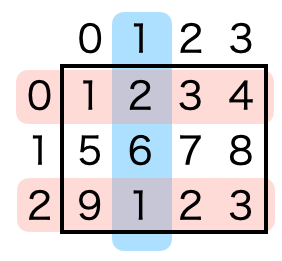

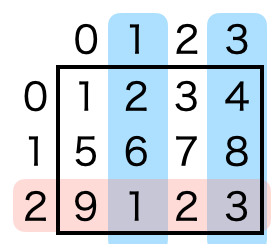

In [ ]:
# 上図
# axis 1のインデックスが1に固定されているとき，a[0, 1]とa[2, 1]は次のように取れる
print(a[[[0],
         [2]], 1]) # このとき，axis 0に指定するListや配列はaxis 0と同じ向き(縦向き)にする
print(a[[0, 2], 1])

#下図
# axis 0のインデックスが2に固定されているとき，a[0, 1]とa[0, 3]は次のように取れる
print(a[2, [[1, 3]]]) # このとき，axis 1に指定するListや配列はaxis 1と同じ向き(横向き)にする

[[2]
 [1]]
[2 1]
[[1 3]]


では，次のように，各軸から複数ずつ取ってくる(=小行列を取ってくる)場合はどのように書くでしょうか？

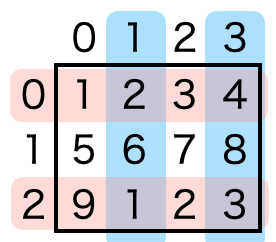

さっきと同じように各axisにListや1次元配列を指定すれば良いです。

In [ ]:
print(a[[[0], [2]], [[1, 3]]]) # このとき，axis 0に指定するListや配列はaxis 0と同じ向き(縦向き)にする

[[2 4]
 [1 3]]


In [ ]:
print(a[[0, 2], [1, 3]]) # こうしてしまうと，a[0, 1], a[2, 3]を取ってきてしまう

[2 3]


ここで，`[[[0], [2]], [[1, 3]]]`というインデックスは非常に読みにくく，打ちたくもないため，`[0, 2], [1, 3]`を引数に与えると`[[[0], [2]], [[1, 3]]]`を返すような関数`np.ix_()`があります。

In [ ]:
# 以下の2つは同じ
idx = np.ix_([0, 2], [1, 3])
print(a[idx])
print(a[[[0], [2]], [1, 3]])

[[2 4]
 [1 3]]
[[2 4]
 [1 3]]


### 2.4.2 スライシング

2次元配列も，各axisにスライスを使うことができます。スライスは`start: end(: step)`と表せましたが，全ての軸を選ぶ場合は`:`というスライスを使います。

In [ ]:
# aの0行目から1行目までを取り出す
# すなわち， axis 0の選択はスライスでかくと0:2で，axis 1での選択はスライスでかくと: となる
print(a[0:2])

[[1 2 3 4]
 [5 6 7 8]]


In [ ]:
# aの0列目から2列目までを取り出す
# すなわち， axis 0の選択はスライスでかくと : で，axis 1での選択はスライスでかくと0: 3となる
print(a[:, 0: 3])

[[1 2 3]
 [5 6 7]
 [9 1 2]]


In [ ]:
# aの0行目から1行目かつ0列目から2列目を取り出す
# すなわち， axis 0の選択はスライスでかくと0: 2で，axis 1での選択はスライスでかくと0: 3となる
print(a[0: 2, 0: 3])

[[1 2 3]
 [5 6 7]]


### 2.4.3 ブールインデックス参照

2次元配列でも，indexにbool値を持つ2次元配列を指定することでTrueの部分の値を抜き出すことができます。このとき，インデックスは**同じshape**でなければいけません。

In [ ]:
a = np.array([2, 2, 3, 6, 0, 6, 7, 9]).reshape(2, 4)

print("a: ", a)
# aのうち3の倍数である値を抜き出す
idx = a%3 == 0
print("ブールインデックス: \n", idx)
print(type(idx))
print(a[idx])

a:  [[2 2 3 6]
 [0 6 7 9]]
ブールインデックス: 
 [[False False  True  True]
 [ True  True False  True]]
<class 'numpy.ndarray'>
[3 6 0 6 9]


また，あるaxisに対してのみブールインデックスを指定することもできます。

In [ ]:
print(a[:, [False, True, False, True]]) # axis 1にブールインデックスを指定

[[2 6]
 [6 9]]


2.4.1でやったように，2つのaxisにブールインデックスを指定して交差した部分を得るには`np.ix_()`関数が使えます。

In [ ]:
print(a[np.ix_([True, True], [True, True, False, True])])

[[2 2 6]
 [0 6 9]]


### 2.4.4 練習問題

**問1**\
(1) 0~99までの100個の連続整数を値にもつ1次元の`np.ndarray`を作成し，shapeが`(10, 10)`の2次元配列となるように整形してください。\
(2) (1)の配列から偶数行目を抜き出したshapeが`(5, 10)`の2次元配列を作成してください。ただし行は0から数えます。\
(3) (1)の配列から奇数列目を抜き出したshapeが`(10, 5)`の2次元配列を作成してください。ただし列は0から数えます。\
(4) (1)の配列から，偶数行目かつ奇数列目にある値を要素にもつshapeが`(5, 5)`の2次元配列を作成してください。ただし行と列は0から数えます。

# 2.5 Numpyの発展

### 2.5.1 科学定数
Numpyでは$\pi やe$などの科学定数の他に，$\infty$に対応する`np.inf`があります。

In [ ]:
print("円周率: ", np.pi)
print("ネイピア数: ", np.e)

円周率:  3.141592653589793
ネイピア数:  2.718281828459045


In [ ]:
print("正の無限大: ", np.inf)
print("負の無限大: ", - np.inf)

正の無限大:  inf
負の無限大:  -inf


`np.inf`は四則演算で次のような性質を持ちます。

In [ ]:
print(1 + np.inf)
print(1 - np.inf)
print(2 * np.inf)
print(2 / np.inf)

inf
-inf
inf
0.0


また，条件演算では`a`の値によらず次の性質を持ちます。

In [ ]:
a = 10000000
print(a < np.inf)
print(- np.inf < a)

True
True


### 2.5.2 乱数を値にもつNumpyの配列

Numpyには乱数を扱うライブラリも持っており，乱数の値を持つ配列を作ることができます。

In [ ]:
from numpy import random

In [ ]:
# [0, 1)上の一様乱数を一つ生成.0は含むが1は含まない.
print(random.rand())

# 引数にshapeをかくとそのshapeの一様乱数が生成される
print(random.rand(5)) # 長さ5(=shapeが(5, ) )の1次元配列
print(random.rand(5, 5)) # shapeが(5, 5)の2次元配列

0.048017883480744095
[0.14303637 0.29292055 0.70681311 0.3790383  0.38345339]
[[0.8650329  0.11445742 0.40689368 0.9545395  0.2391257 ]
 [0.89509289 0.22627016 0.37583445 0.35718311 0.85841813]
 [0.80688879 0.14916015 0.83891578 0.66506947 0.18048015]
 [0.56894813 0.13949708 0.55245918 0.03556615 0.66994254]
 [0.26465924 0.22505814 0.53423685 0.90566074 0.7444535 ]]


また，`rand()`ではなく`randn()`を使うことで正規分布からサンプリングすることもできます。

In [ ]:
# 標準正規分布(平均0, 分散1)に従う乱数を一つ生成
print(random.randn())

# 引数にshapeをかくとそのshapeの乱数が生成される
print(random.randn(5)) # 長さ5(=shapeが(5, ) )の1次元配列
print(random.randn(5, 5)) # shapeが(5, 5)の2次元配列

2.096458430410689
[ 2.38629887  0.29589969 -0.75956636 -0.70596349 -0.32399334]
[[-1.27895109  0.98044737 -0.4024593  -0.29253267 -1.32148831]
 [-0.29067105  0.38555076 -0.23291594 -0.85709285  0.26092565]
 [ 1.45212352  1.7577437   0.67213894  1.08819757 -0.44176571]
 [-0.99365424  2.1616491  -0.17303493 -0.25307769 -0.31551138]
 [ 0.80249331 -0.78699444 -1.12546658 -0.02351425 -0.01669546]]


また，平均と標準偏差を指定したいときは`normal(mean, std, shape)`を使います。

In [ ]:
print(random.normal(100, 10)) # 平均100, 標準偏差10の正規分布に従う乱数
print(random.normal(100, 10, 5)) # 平均100, 標準偏差10の正規分布に従う乱数を5つ持つ1次元配列として作成
print(random.normal(100, 10, (5, 5)))
# 平均100, 標準偏差10の正規分布に従う乱数を値にもつshape (5, 5)の2次元配列として作成

111.79837206654754
[124.95035453 101.86218952  95.28835151 100.56134859  91.67493182]
[[115.54468721 104.12035298 114.80963829 104.20319794  98.70689921]
 [ 96.21017649  86.72542542 103.91390126 105.82350084 107.7430399 ]
 [113.82633648  97.83763319  90.86636489 115.10146406 101.907012  ]
 [100.98309992  89.59497873  97.89813114 106.34870728 100.08347697]
 [ 98.07034715  90.9272627   97.6762467  108.01394916  96.62912252]]


また，整数を乱数として生成する`randint`というものもあります。

In [ ]:
print(random.randint(4)) # 0~3の整数を生成
print(random.randint(2, 10, (3, 3))) # 2~9の整数をランダムに値にもつshape (3, 3)の2次元配列を生成

1
[[5 5 9]
 [9 8 2]
 [7 8 9]]


上の乱数の生成でしたが，毎回実行すると結果が変わっていました。しかし，再現性の観点から発生する乱数を固定したいことがあります。そこでseed(乱数の種)というものを設定するとseedが同じならば同じ乱数が生成されることがわかります。

In [ ]:
random.seed(seed=32) # seedは好きなintで良い

# 何回実行しても値は同じ
print(random.rand(5))
print(random.rand(5))
print(random.randint(2, 10, (3, 3)))

[0.85888927 0.37271115 0.55512878 0.95565655 0.7366696 ]
[0.81620514 0.10108656 0.92848807 0.60910917 0.59655344]
[[3 4 5]
 [2 4 4]
 [4 6 4]]


### 2.5.3 線形代数の基本的な計算

線形代数の計算がNumpyの醍醐味の一つでもあります。今回は次の配列を使います。

In [ ]:
x = np.arange(1, 4)
y = np.arange(6, 9)
A = np.arange(1, 10).reshape(3, 3)
B = random.randint(1, 10, (3, 3))

print("x: ", x)
print("y: ", y)
print("A: ", A)
print("B: ", B)

x:  [1 2 3]
y:  [6 7 8]
A:  [[1 2 3]
 [4 5 6]
 [7 8 9]]
B:  [[5 5 6]
 [7 9 5]
 [1 7 5]]


#### 転置

転置は2次元配列に対して定義される操作で，`np.transpose()`または`np.ndarray.T`を用いるとできます。

In [ ]:
# 以下の二つは同じ
print(np.transpose(A))
print(A.T)

[[1 4 7]
 [2 5 8]
 [3 6 9]]
[[1 4 7]
 [2 5 8]
 [3 6 9]]


#### 内積，行列積
内積や行列積は`np.dot()`や`np.matmul()`または`@`を使います。これらの違いは話すとかなりレベルが飛躍してしまうので省略します。この講座のレベルでは同じものだと思ってもらって構わないでしょう。ただし，`@`についてはNumpyではなくPython 3.5以降にナイーブに組み込まれた演算子であり，(個人的な意見ですが)まだ`@`の使用は定着している印象を受けません。

In [ ]:
print("xとyの内積")
print(np.dot(x, y))
print(np.matmul(x, y))
print(x@y)

print("AとBの行列積")
print(np.dot(A, B))
print(np.matmul(A, B))
print(A@B)

xとyの内積
44
44
44
AとBの行列積
[[ 22  44  31]
 [ 61 107  79]
 [100 170 127]]
[[ 22  44  31]
 [ 61 107  79]
 [100 170 127]]
[[ 22  44  31]
 [ 61 107  79]
 [100 170 127]]


以下では`np.matmul()`を用いていくとします。

In [ ]:
# 行列なので積の順番を変えて答えが一致するとは限らない。
print(np.matmul(A, B))
print(np.matmul(B, A))

[[ 22  44  31]
 [ 61 107  79]
 [100 170 127]]
[[ 67  83  99]
 [ 78  99 120]
 [ 64  77  90]]


**ブロードキャスト**\
行列計算にもブロードキャストが行われます，以下の例を見てみましょう。

$y=Ax$

In [ ]:
# ブロードキャストの簡単な例
print(np.matmul(A, x)) # xは縦ベクトルとして解釈される
print(np.matmul(x, A)) # xは横ベクトルとして解釈される

[14 32 50]
[30 36 42]


### *Tips*
>ベクトル(1次元配列)において縦ベクトルと横ベクトルを区別したい時が多いので，実際には1次元配列ではなく2次元配列として扱うと便利なことが多いです。例えば，5次元ベクトルを扱うのにshape (5, )の1次元配列ではなくshape (5, 1)の2次元配列とすることによって転置などの操作が可能になります。

In [ ]:
# Tips

a = np.array([1, 0, 1, 0, 1])# 5次元ベクトルを表す1次元配列

# 転置をする前後で変わらない(axisが一つしかないため)
print("転置前: ", a)
print("転置後: ", a.T)

# 2次元配列にすると縦ベクトルと横ベクトルが区別できて，わかりやすいことがある

# aを横ベクトルの2次元配列にする
a = a.reshape(1, -1) # axisを-1にすると要素数を自動で計算してくれる
print("転置前: ", a)
print("転置後:\n ", a.T)

転置前:  [1 0 1 0 1]
転置後:  [1 0 1 0 1]
転置前:  [[1 0 1 0 1]]
転置後:
  [[1]
 [0]
 [1]
 [0]
 [1]]


#### 線形代数計算ライブラリlinalg

Numpyには線形代数に関する諸々の計算ができるように，linalgというパッケージを内包しています。

In [ ]:
from numpy import linalg as LA

linalgにある基本的な関数を紹介します。

In [ ]:
# 行列式を求める
print(LA.det(A))
print(LA.det(B))

# 逆行列を求める
print(LA.inv(B)) # Aは非正則行列なので逆行列を求めようとするとエラーが出る

0.0
139.99999999999994
[[ 0.07142857  0.12142857 -0.20714286]
 [-0.21428571  0.13571429  0.12142857]
 [ 0.28571429 -0.21428571  0.07142857]]


In [ ]:
# ノルムを求める
# デフォルトではL2ノルム
print(LA.norm(x))
print(LA.norm(y))

# ordという引数を指定するとLpノルムに対応
print(LA.norm(x, ord=1))
print(LA.norm(y, ord=np.inf)) # ordにnp.infを指定するときちんとL∞ノルムになっている

3.7416573867739413
12.206555615733702
6.0
8.0


また，この`LA.norm()`関数は集約関数であり，2次元以上の配列を指定すると`axis`を指定することができます。`keepdims`をTrueにすると形状を保ちます。

In [ ]:
print("A:")
print(A)

print()
print("keepdims=False(デフォルト)")
print("axis=0", LA.norm(A, axis=0))
print("axis=1", LA.norm(A, axis=1))

print()
print("keepdims=True")
print("axis=0")
print(LA.norm(A, axis=0, keepdims=True))
print("axis=1")
print(LA.norm(A, axis=1, keepdims=True))

A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

keepdims=False(デフォルト)
axis=0 [ 8.1240384   9.64365076 11.22497216]
axis=1 [ 3.74165739  8.77496439 13.92838828]

keepdims=True
axis=0
[[ 8.1240384   9.64365076 11.22497216]]
axis=1
[[ 3.74165739]
 [ 8.77496439]
 [13.92838828]]


他にもlinalgには固有値や特異値を求めたり，特異値分解やLU分解をはじめとした行列の各種標準形を求めることもできます。

# 2.6 Numpyの学習の仕方

今回，たくさんのNumpyの機能を紹介してきましたが，これはあくまで氷山の一角です。今日扱った内容を含めて，どの程度まで覚える必要があるのでしょうか？

この節では，Numpyとの上手な付き合い方について解説していきます。ここに書いてあることは今後この講座で扱う全てのライブラリに共通することです。特に，Pythonプログラミング初心者に学習の道標を掲げていきたいと思います。

### 2.6.1 プログラミングの調べ方

まず，Numpyの機能についてどこまで覚える必要があるのか？ということですが，これに関しては自分から覚えるべきことは少ないと思っています。特に，今回の講義だと，1，2次元配列の基本的な扱い方を覚えるだけでよく，他の機能については，**その都度調べればよい**のです。そうすることで，自然とよく使うものは覚える一方，滅多に使わないようなものをたくさん覚える必要もなくなります。実際，プロのエンジニアでも自分が普段扱わない機能については知らないことはたくさんあり，その都度調べています。

では，実装したい機能があったときにどのように調べれば良いのでしょうか？今回はNumpyの1次元配列を大きい順にソートするという操作が必要になったという状況を仮定して，調べるまでの手順を追ってみましょう。

**手順①** やりたいことの言語化
>例: Numpyの配列に対してソートをしたい

**手順②** 検索エンジンで検索。このとき，「言語(or ライブラリ名) キーワード1, キーワード2, ...」\
日本語で検索すると日本語の解説記事が出てきます。
>例: 「numpy 配列 ソート」で検索をする

また，今後エンジニアになりたい人は英語で入力して公式のレファレンスで検索するということを癖づけましょう。これは，いずれあるレベルに達したときに日本語の記事での解説がなかったり誤っていたりすることが少なくないためです。
>例: numpyの[公式リファレンス](https://docs.scipy.org/doc/numpy/reference/)内で「ndarray sort」で検索

**手順③** 公式リファレンスをみた場合，引数と戻り値とその定義を確認する\
ここで，自分の実装したい機能が作れそうかわかります。また，多くの場合`example`を載せてくれているのでそこも参考にできます。
>例: 公式リファレンスを見ると，いくつか[検索結果](https://docs.scipy.org/doc/numpy/search.html?q=ndarray+sort)が出てきます。一番上のnumpy.ndarray.sortを見ると，ソートするaxisを指定したり，ソートアルゴリズムを選択したりできるようだ。また，`Sort an array in-place. `と書いてあるので，ソート後の配列を出力するわけではなく実行するだけで元の配列がソートされることもわかる。

以上を経て，目的の関数にたどり着くことができました。しかし，公式のリファレンスを見るとソートの際は小さい順に並べられて，大きい順にならべるように指定するような引数がないことがすぐにわかるため，小さい順に並べた後，自分で逆順にすればいいということがわかりました。

In [ ]:
a = random.randint(1, 100, (5,))
print(a)

# 小さい順に並べ替え
a.sort() # 実行するだけでaがsortされる
# a_sorted = a.sort() これは間違い。a.sort()は何も返さないのでNoneになる。
print(a)

# スライスを使って逆順にする
print(a[: : -1])

[63 31 81 84 51]
[31 51 63 81 84]
[84 81 63 51 31]


ある程度慣れてくると，どういうキーワードで計算すれば目的のものに辿り着けるのかわかってくるようになります。また，公式のリファレンスを読んで理解して使うことで，よく使うものは自然に覚えるようになります(日本語の解説記事を毎回コピペしていてはそうはなれません)。

### 2.6.2 練習問題

**問1**\
(1) 1次元配列に対して，最大値のインデックスを取得する関数を自分で調べて，実行してください。\
(2) 2次元配列のaxis 1の方向で各最大値のインデックスを取得してください。その際次元を保持するようにして下さい。\
(3) 2次元配列の最大値のインデックスの場所が何行何列目かを取得する操作を自分で調べて実装してください。

In [ ]:
# (1)

# (2)

# (3)

In [ ]:
#(1)
#入力例
a = np.array([3, 8, 2, 6, 4, 4])
# 出力例
# 1

#(2)
# 入力例
a = np.array([3, 8, 2, 6, 4, 4]).reshape(2, 3)
# 出力例
# [[1],
#[0]]

#(3)
# 入力例
a = np.array([3, 8, 2, 6, 4, 4]).reshape(2, 3)
# 最大値8は(0, 1)成分にある
# 出力例
# (0, 1)

# 2.7 総合問題

**問1**\
昨今，深層学習を用いた自然言語処理において，GoogleのTransformerというものをベースとしたモデルがいくつかの自然言語処理タスクで人間越えの精度を出したことで脚光を浴びました。

そして，2020年1月にGoogleはそのTransformerの時間計算量と空間計算量を改善した[Reformer](https://arxiv.org/abs/2001.04451)を発表しました。今回は，この論文の中で，Transformerの時間計算量を改善した部分に用いられた[*cross-polytope LSH*](https://arxiv.org/abs/1509.02897)というものを誘導付きで実装してみましょう。

いま，次の問題を考えます：
>$n$本のベクトルに対して，"似ている"ベクトルには同じ整数値を，"似ていない"ベクトルには異なる整数値を割り当てられる方法を考えたい。このとき，ベクトルが"似ている"とは，ベクトル同士のなす角が0に近いことをいう。

この問題は以下の難点があります：
- なす角がどれくらい以下になれば似ているとして決めるのか。
- ベクトル$a$と$b$, $b$と$c$がそれぞれ"似ている"とき，$a$と$c$が"似ている"とは限らない。
- なす角$\theta$を求めるには内積とノルムを使えば$\cos \theta$を計算できる。この値をソートして整数値をいい感じに割り振れば良さそうだが，基本的にソートは$n$が大きくなると遅い(ベクトルの組合せは$_nC_2 = O(n^2)$もある)。

そこで次の確率的な解法を考えます:\
①全てのベクトルを同じ角度だけ回転する。このときの回転角はランダムに決める。

②"似ている"ベクトル同士は，回転後も**高確率で**同じ象限にあり，"似ていない"ベクトル同士は**高確率で**違う象限にある。

③よって，ランダムな回転後のそれぞれのベクトルが属する象限の番号をそのベクトルに割り当てる整数値とすれば**高確率で**問題が解ける。

これを実装します。

今回は3次元横ベクトルを100本用意したものを考えます。

In [ ]:
A = random.randn(100, 3) # 3次元横ベクトルを100本縦に積み重ねた行列
print(A)

[[-1.25729761e+00  1.31523289e-01 -2.08643747e-01]
 [-8.78669457e-02  7.57046741e-01 -1.13198515e+00]
 [ 6.97402632e-01  1.00887717e+00 -7.22111216e-02]
 [-2.06955670e+00 -1.88590475e+00  2.25805985e-01]
 [ 3.33799527e-01 -2.54019892e-02 -2.52197278e+00]
 [ 2.80811210e-02  6.63577857e-01  4.16240107e-01]
 [-2.15065579e-01  1.44982170e+00 -8.83102569e-03]
 [-5.39806845e-02  1.00633631e+00 -1.63605044e+00]
 [-1.02235111e+00  2.44516303e-01 -2.21015285e+00]
 [ 3.26456903e-01 -3.63160883e-01  1.41407207e+00]
 [ 4.96109674e-01 -1.20747123e+00 -1.34398282e+00]
 [ 8.22277292e-01 -8.02181282e-02 -1.08866267e+00]
 [-1.45922313e+00 -1.68142193e+00 -1.46383841e+00]
 [-8.72356892e-01 -2.09853500e+00  1.61268550e+00]
 [ 6.96499879e-01  9.84394048e-01 -7.31798594e-01]
 [ 9.53365784e-01  2.09775651e-02 -1.47729696e+00]
 [-1.63575942e-01 -1.82608959e-01  5.94683186e-01]
 [-1.29412545e+00  5.40003844e-01  2.20205418e+00]
 [ 7.84806457e-01  5.86142982e-01  1.19439382e+00]
 [-4.90193426e-01  2.23024006e-

1) 100本のベクトルを回転させる行列Rを生成し，回転後のベクトルを縦に積み重ねた(100, 3)の行列を求めます。ここで，ランダムな回転をする3次元回転行列Rは，gen_R_3d関数の引数にランダムに生成された3つの角度パラメータからなる1次元配列を入力することで生成します。

In [ ]:
# (1)
def gen_R_3d(p):
    px, py, pz = p
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(px), np.sin(px)],
                   [0, -np.sin(px), np.cos(px)]])
    Ry = np.array([[np.cos(py), 0, -np.sin(py)],
                   [0, 1, 0],
                   [np.sin(py), 0, np.cos(py)]])
    Rz = np.array([[np.cos(pz), np.sin(pz), 0],
                   [-np.sin(pz), np.cos(pz), 0],
                   [0, 0, 1]])

    return Rz@Ry@Rx

(2) (1)で求めたベクトルは大きさも変わってしまっているため規格化する必要があります．(1)の各ベクトルを，(L2)ノルムが1となるように規格化して，順番を変えないまま縦に積み重ねた(100, 3)の行列を求めてください。

In [ ]:
# (2)

(3) (2)で求めたノルム1の100本のベクトルに対して，それらを$-1$倍した100本のベクトルと元の100本のベクトルを，100本の順番を変えないまま**横に**積み重ねた(100, 6)の行列を求めてください。

In [ ]:
# (3)

(4)(やや難)いま，3次元空間なので象限は第0〜第7までの8象限あります。ここで，象限を求める代わりに，正規直交基底(標準基底)とその逆向きのベクトル(合わせて6本,適当に番号を振ってよい)のうち最も"似ている"ものの番号を求めるとします。回転後のベクトルの番号を格納した(100, 1)の行列を求めてください。
(ヒント: ベクトルの割り振る番号を求めるのにどうすればいいかを考える。ここで内積を使うと計算が遅い。わからない人は3次元ではなく，2次元のベクトルについて考えてみよう。ここで，(2)で規格化したことを用いるとよいかも)

In [ ]:
# (4)

ここで得られた100個の整数が，100本のベクトルに割り当てられる値となる。

(5) (余力のある人)100本のベクトル間の任意の2本のなす角$\theta$の対して$\cos \theta$を計算し，"似ている"ベクトル同士は高確率で同じ整数値が割り振られており，"似ていない"ベクトル同士は高確率で異なる整数値が割り当てられていることを確認してください。

In [ ]:
# (5)